In [1]:
# Heston Stochastic Volatility Model
## page number 145 : Tools from Stochastic Analysis for Mathematical Finance: A Gentle Introduction
## Hamza & Parth

## SDEs
# dS(t) = mu*S(t)*dt+ sqrt(v(t))*S(t)*dW1(t), v(t) is a CIR process
# dv(t) = kappa*(theta-v(t))*dt + sigma*sqrt(v(t))*dW2(t)

# The stock price follows a geometric Brownian motion with a stochastic volatility. The square of the volatility 
# (the variance) follows a CIR process. 

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm
import matplotlib as mpl
from cycler import cycler

In [2]:
# Parameters

np.random.seed(seed=4) 
N = 20000            # time steps 
paths = 200              # number of paths
T = 1
T_vec,dt = np.linspace(0,T,N, retstep=True )
dt_sq = np.sqrt(dt)

s0 = 100          # spot price
v0 = 0.04         # spot variance

mu = 0.1 # drift
rho = -0.2 # correlation coefficient
kappa = 2 # mean reversion coefficient
theta = 0.04  # long-term variance
sigma = 0.3  # Volatility of inst. variance
std_asy = np.sqrt( theta * sigma**2 /(2*kappa) ) # asymptotic standard deviation for the CIR process
assert(2*kappa * theta > sigma**2)   # Feller condition

In [3]:
# Paths

# Generate Brownian Motion
MU = np.array([0, 0])
COV = np.matrix([[1, rho], [rho, 1]])
W = ss.multivariate_normal.rvs( mean=MU, cov=COV, size=(paths,N-1) )
W_S = W[:,:,0]   # Stock Brownian motion:     W_1
W_v = W[:,:,1]   # Variance Brownian motion:  W_2

# Initialize vectors
V = np.zeros((paths,N))
V[:,0] = v0
S = np.zeros((paths,N))
S[:,0] = s0
v = np.zeros(N)

# Generate paths
for t in range(0,N-1):
    v = V[:,t]            # variance 
    v_sq = np.sqrt(v)     # square root of variance 
    
    V[:,t+1] = V[:,t] + (kappa*(theta-v))*dt + sigma*(v_sq)*dt_sq*W_v[:,t]   
    S[:,t+1] = S[:,t] + (mu-0.5*v)*dt + v_sq*dt_sq*W_S[:,t]

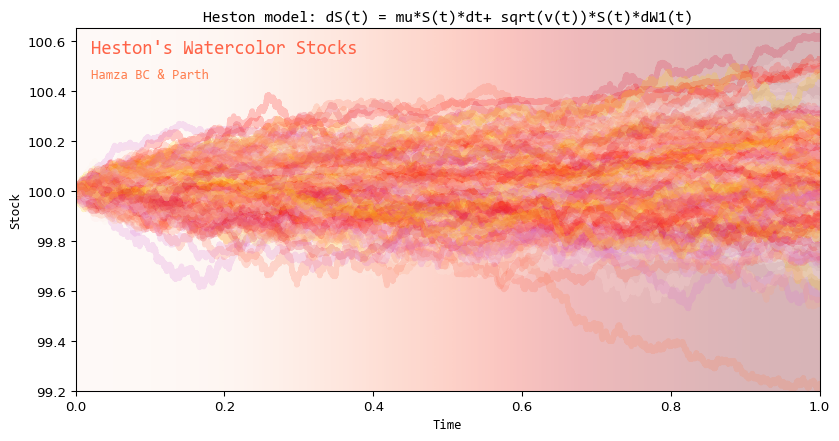

In [11]:
# Plots

grad = [[0, 1], [0, 1]]
xl = 0
xh = 1
yl = 99.2
yh = 100.65

plt.figure(figsize=(10,5),dpi=96)
hfont = {'fontname':'Consolas'}

## You can use the color mapper instead, i preferred making my own!

#cmap = plt.cm.RdPu
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['crimson','coral','tomato','red','orchid','mistyrose','linen','lightsalmon','gold']) 
#mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=cmap(np.linspace(0, 1, paths)))


plt.title("Heston model: dS(t) = mu*S(t)*dt+ sqrt(v(t))*S(t)*dW1(t)",**hfont)
plt.xlabel("Time",**hfont)
plt.ylabel("Stock",**hfont)
plt.margins(0)

plt.imshow(grad,  cmap = cm.Reds, interpolation = "bicubic", extent = [xl, xh, yl, yh],alpha = .3, aspect = "auto")
plt.plot(T_vec, S.T,alpha=0.2,linewidth=4)
plt.text(0.02, 100.55, "Heston's Watercolor Stocks",**hfont,fontsize=14,color="tomato")
plt.text(0.02, 100.45, "Hamza BC & Parth",**hfont,color="coral")

plt.show()







<function matplotlib.pyplot.show(close=None, block=None)>

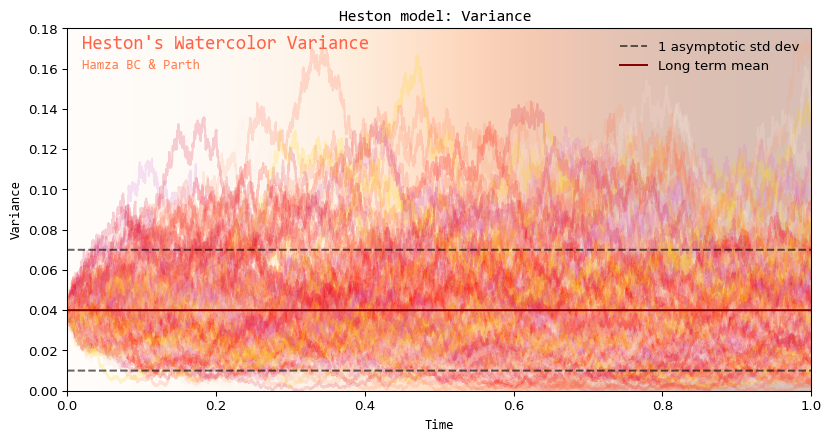

In [16]:
plt.figure(figsize=(10,5),dpi=96)

xl2 = 0
xh2 = 1
yl2 = 0
yh2 = 0.18

plt.plot(T_vec, V.T ,alpha=0.2)

plt.title("Heston model: Variance ",**hfont)
plt.xlabel("Time",**hfont);
plt.ylabel("Variance",**hfont)

plt.plot(T_vec, (theta + std_asy)*np.ones_like(T_vec), label="1 asymptotic std dev", color="black",alpha=0.6,linestyle='--' )
plt.plot(T_vec, (theta - std_asy)*np.ones_like(T_vec), color="black" ,alpha=0.6,linestyle='--' )
plt.plot(T_vec, theta*np.ones_like(T_vec), label="Long term mean" ,color='darkred' )

plt.imshow(grad,  cmap = cm.Oranges, interpolation = "quadric",extent = [xl2, xh2, yl2, yh2],alpha = .3, aspect = "auto")
plt.text(0.02, 0.17, "Heston's Watercolor Variance",**hfont,fontsize=14,color="tomato")
plt.text(0.02, 0.16, "Hamza BC & Parth",**hfont,color="coral")
plt.legend(loc='upper right',frameon=False)

plt.margins(0)
plt.show